In [114]:
import requests
from bs4 import BeautifulSoup
import urllib.parse
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_random_wikipedia_kanji():
    # Wikipedia API endpoint for a random page
    api_url = 'https://ja.wikipedia.org/w/api.php?action=query&list=random&rnlimit=1&format=json'

    response = requests.get(api_url)
    data = response.json()

    # Extract the title of the randomly selected page
    page_title = data['query']['random'][0]['title']

    # Construct the Wikipedia page URL using the title
    encoded_title = urllib.parse.quote(page_title)
    page_url = f'https://ja.wikipedia.org/wiki/{encoded_title}'

    print(f"Processing: {page_url}")

    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract kanji data from the Wikipedia page
    kanji_data = []
    for paragraph_tag in soup.find_all('p'):
        kanji_text = ''.join(char for char in paragraph_tag.text if char.isalnum())
        kanji_data.extend(kanji for kanji in kanji_text if '\u4e00' <= kanji <= '\u9fff')

    return kanji_data

In [ ]:
# Number of iterations
num_iterations = 343

# List to store kanji data from each iteration
all_kanji_data = []

# Perform the process 100 times
for _ in range(num_iterations):
    kanji_data = get_random_wikipedia_kanji()
    all_kanji_data.extend(kanji_data)
    # Add a delay to avoid making too many requests in a short time
    time.sleep(1)

# Print first ten entries for verification
print(all_kanji_data[:10])

In [ ]:
# Create a dictionary to store the frequency of each kanji character
kanji_frequency_dict = {}

# Count the frequency of each kanji character
for kanji in all_kanji_data:
    kanji_frequency_dict[kanji] = kanji_frequency_dict.get(kanji, 0) + 1

# Create a dataset with columns for kanji and frequency
kanji_frequency_df = pd.DataFrame(list(kanji_frequency_dict.items()), columns=['Kanji', 'Frequency'])

# Sort Kanji by Frequency (Descending)
kanji_frequency_df = kanji_frequency_df.sort_values(by='Frequency', ascending=False)
kanji_frequency_df = kanji_frequency_df.reset_index(drop=True)

In [ ]:
# I wanted to add all remaining Joyo kanji with frequency = 0
# Wikipedia URL for the Joyo kanji list
url = "https://en.wikipedia.org/wiki/List_of_j%C5%8Dy%C5%8D_kanji"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table containing Joyo kanji
    joyo_table = soup.find("table", {"class": "wikitable"})

    # Convert the HTML table to a DataFrame using pandas
    joyo_df = pd.read_html(str(joyo_table))[0]

    joyo_df.rename(columns={"New (Shinjitai)": "Kanji"}, inplace=True)

    # Display the DataFrame
    print(joyo_df)
else:
    print(f"Failed to retrieve content. Status code: {response.status_code}")

In [43]:
kanji_set_frequency = set(kanji_frequency_df["Kanji"])
kanji_set_joyo = set(joyo_df["Kanji"])

# Find the set difference (kanji in joyo_df but not in kanji_frequency_df)
kanji_not_in_frequency = kanji_set_joyo - kanji_set_frequency

# Convert the result to a list
kanji_not_in_frequency_list = list(kanji_not_in_frequency)

# Display the list of joyo kanji not in kanji_frequency_df
print(kanji_not_in_frequency_list)

['醜', '弄', '嘆', '虐', '愉', '悟', '謁', '疾', '匂', '箸\xa0[7]', '惨', '某', '賠', '愁', '舌', '胃', '践', '刹', '卑', '唇', '瘍', '蜂', '牙\xa0[5]', '暑', '乞', '飢', '飽', '泥', '又', '戒', '嬢', '侯', '升', '采', '廉', '遮', '汎', '膨', '漂', '慨', '窮', '剣', '旺', '屈', '腺', '倹', '汰', '蚊', '醒', '憎', '飯', '爽', '虎', '煎\xa0[7]', '凸', '炭', '劾', '摯', '到', '郭', '后', '岬', '淫\xa0[7]', '篤', '罷', '妬', '嫉', '嗣', '漬', '菓', '弐', '菌', '餌\xa0[8]', '粗', '臆', '柿', '喉', '僅\xa0[7]', '杯', '蛇', '睦', '溺\xa0[7]', '叫', '朕', '拉', '眉', '俵', '鼓', '庶', '眺', '憾', '楷', '諧', '宙', '儒', '璽', '凹', '刀', '撲', '酌', '坑', '雷', '壱', '陪', '柵', '葛\xa0[7]', '悼', '艇', '痢', '径', '胴', '茶', '嘱', '窯', '詐', '珠', '恒', '羊', '幻', '斬', '債', '抹', '凶', '尋', '酷', '丙', '炉', '凄', '畏', '芋', '殻', '辣', '拷', '舷', '屯', '擬', '淑', '拙', '婿', '宵', '濯', '剝\xa0[7]', '翁', '頒', '餓', '粛', '粒', '滴', '塊', '褐', '嫡', '塀', '欺', '塡\xa0[7]', '庸', '髄', '喪', '浴', '瓦', '喝', '捜', '遵', '椅', '箋', '唄', '錠', '暁', '胞', '偵', '綻', '憧', '韓\xa0[5]', '舟', '据', '鉢', '餅\xa0[8]', '塾', '釜', '蚕', '詔', '梅', '遜\xa0[8]'

In [ ]:
missing_kanji_df = pd.DataFrame({"Kanji": kanji_not_in_frequency_list, "Frequency": [0] * len(kanji_not_in_frequency_list)})

# Concatenate the new DataFrame to kanji_frequency_df
kanji_frequency_df = pd.concat([kanji_frequency_df, missing_kanji_df], ignore_index=True)

# Display the updated DataFrame
print(kanji_frequency_df)

In [48]:
# Remove extra characters from the "Kanji" column in kanji_frequency_df
kanji_frequency_df["Kanji"] = kanji_frequency_df["Kanji"].str.replace(r'\s*\[\d+\]$', '')

C:\Users\natel\AppData\Local\Temp\ipykernel_16248\1644317896.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  kanji_frequency_df["Kanji"] = kanji_frequency_df["Kanji"].str.replace(r'\s*\[\d+\]$', '')


In [59]:
# I break the data into thirds due to limit of 1000 per hour on API for next steps
kanji_frequency_df_subset1 = kanji_frequency_df.iloc[0:1000].copy()  # Rows 0 to 999
kanji_frequency_df_subset2 = kanji_frequency_df.iloc[1000:1600].copy()  # Rows 1000 to 1599
kanji_frequency_df_subset3 = kanji_frequency_df.iloc[1600:].copy()  # Rows 1600 to 2502

In [ ]:
url = "https://japanese-text-analysis.p.rapidapi.com/"

with open("kanji_apikey.txt", "r") as key_file:
    api_key = key_file.read().strip()

headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "japanese-text-analysis.p.rapidapi.com",
    "Content-Type": "application/json"
}

kanji_list = kanji_frequency_df_subset1["Kanji"].tolist()

# Initialize lists to store data
literal_list = []
frequency_list = []
grade_list = []
jlpt_list = []
meanings_list = []
radical_list = []
ranking_list = []
stroke_count_list = []

# Iterate through kanji characters
for kanji in kanji_list:
    # Update the GraphQL query for the specific kanji
    payload = {
        "query": f"""
            query MyQuery {{
                kanji(literal: "{kanji}") {{
                    literal
                    frequency
                    grade
                    jlpt
                    meanings
                    radical
                    ranking
                    stroke_count
                }}
            }}
        """
    }

    # Make the request
    response = requests.post(url, json=payload, headers=headers)

    # Handle the response
    if response.status_code == 200:
        data = response.json().get("data", {}).get("kanji", {})
        # Append data to lists
        literal_list.append(data.get("literal", ""))
        frequency_list.append(data.get("frequency", ""))
        grade_list.append(data.get("grade", ""))
        jlpt_list.append(data.get("jlpt", ""))
        meanings_list.append(data.get("meanings", []))
        radical_list.append(data.get("radical", ""))
        ranking_list.append(data.get("ranking", ""))
        stroke_count_list.append(data.get("stroke_count", ""))
    else:
        print(f"Error for {kanji}: {response.status_code}, {response.text}")

    # Introduce a 1-second delay
    time.sleep(1)

# Create a DataFrame
top_df = pd.DataFrame({
    "Kanji": literal_list,
    "Frequency": frequency_list,
    "Grade": grade_list,
    "JLPT": jlpt_list,
    "Meanings": meanings_list,
    "Radical": radical_list,
    "Ranking": ranking_list,
    "Stroke_Count": stroke_count_list,
})

# Display the DataFrame
print(top_df)

In [ ]:
# repeat for middle "third" of list
url = "https://japanese-text-analysis.p.rapidapi.com/"

with open("kanji_apikey.txt", "r") as key_file:
    api_key = key_file.read().strip()

headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "japanese-text-analysis.p.rapidapi.com",
    "Content-Type": "application/json"
}

kanji_list = kanji_frequency_df_subset2["Kanji"].tolist()

literal_list = []
frequency_list = []
grade_list = []
jlpt_list = []
meanings_list = []
radical_list = []
ranking_list = []
stroke_count_list = []

for kanji in kanji_list:
    payload = {
        "query": f"""
            query MyQuery {{
                kanji(literal: "{kanji}") {{
                    literal
                    frequency
                    grade
                    jlpt
                    meanings
                    radical
                    ranking
                    stroke_count
                }}
            }}
        """
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        data = response.json().get("data", {}).get("kanji", {})
        literal_list.append(data.get("literal", ""))
        frequency_list.append(data.get("frequency", ""))
        grade_list.append(data.get("grade", ""))
        jlpt_list.append(data.get("jlpt", ""))
        meanings_list.append(data.get("meanings", []))
        radical_list.append(data.get("radical", ""))
        ranking_list.append(data.get("ranking", ""))
        stroke_count_list.append(data.get("stroke_count", ""))
    else:
        print(f"Error for {kanji}: {response.status_code}, {response.text}")
    time.sleep(1)

middle_df = pd.DataFrame({
    "Kanji": literal_list,
    "Frequency": frequency_list,
    "Grade": grade_list,
    "JLPT": jlpt_list,
    "Meanings": meanings_list,
    "Radical": radical_list,
    "Ranking": ranking_list,
    "Stroke_Count": stroke_count_list,
})

print(middle_df)

In [ ]:
# Repeat for bottom "third" of list
url = "https://japanese-text-analysis.p.rapidapi.com/"

with open("kanji_apikey.txt", "r") as key_file:
    api_key = key_file.read().strip()

headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "japanese-text-analysis.p.rapidapi.com",
    "Content-Type": "application/json"
}

kanji_list = kanji_frequency_df_subset3["Kanji"].tolist()

literal_list = []
frequency_list = []
grade_list = []
jlpt_list = []
meanings_list = []
radical_list = []
ranking_list = []
stroke_count_list = []

for kanji in kanji_list:
    payload = {
        "query": f"""
            query MyQuery {{
                kanji(literal: "{kanji}") {{
                    literal
                    frequency
                    grade
                    jlpt
                    meanings
                    radical
                    ranking
                    stroke_count
                }}
            }}
        """
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        data = response.json().get("data", {}).get("kanji", {})
        literal_list.append(data.get("literal", ""))
        frequency_list.append(data.get("frequency", ""))
        grade_list.append(data.get("grade", ""))
        jlpt_list.append(data.get("jlpt", ""))
        meanings_list.append(data.get("meanings", []))
        radical_list.append(data.get("radical", ""))
        ranking_list.append(data.get("ranking", ""))
        stroke_count_list.append(data.get("stroke_count", ""))
    else:
        print(f"Error for {kanji}: {response.status_code}, {response.text}")
    # time.sleep(1)

# Create a DataFrame
bottom_df = pd.DataFrame({
    "Kanji": literal_list,
    "Frequency": frequency_list,
    "Grade": grade_list,
    "JLPT": jlpt_list,
    "Meanings": meanings_list,
    "Radical": radical_list,
    "Ranking": ranking_list,
    "Stroke_Count": stroke_count_list,
})

# Display the DataFrame
print(bottom_df)

In [88]:
# renaming some columns for clarity
top_df.rename(columns={'Frequency' : 'Novel_Frequency'}, inplace=True)
top_df.rename(columns={'Ranking': 'Newspaper_Ranking'}, inplace=True)
bottom_df.rename(columns={'Ranking': 'Newspaper_Ranking'}, inplace=True)
bottom_df.rename(columns={'Frequency' : 'Novel_Frequency'}, inplace=True)
middle_df.rename(columns={'Frequency' : 'Novel_Frequency'}, inplace=True)
middle_df.rename(columns={'Ranking': 'Newspaper_Ranking'}, inplace=True)

In [ ]:
# Concatenate the DataFrames along the rows
kanji_data_df = pd.concat([top_df, middle_df, bottom_df], ignore_index=True)

# Display the concatenated DataFrame
print(kanji_data_df)

In [ ]:
# merging my two dataframes
kanji_df = pd.merge(kanji_frequency_df, kanji_data_df, on="Kanji", how="left", suffixes=('_freq', '_data'))

print(kanji_df)

In [ ]:
# creating new column to show if a knaji is joyo or not
kanji_df['In_Joyo'] = kanji_df['Kanji'].isin(joyo_df['Kanji']).map({True: 'Yes', False: 'No'})

# Display the updated kanji_df
print(kanji_df)

In [ ]:
# Rename the 'Frequency' column to 'Wiki_Count' for clarity
kanji_df.rename(columns={'Frequency': 'Wiki_Count'}, inplace=True)

# Create a new column 'Wiki_Ranking' based on the 'Wiki_Count' column
kanji_df['Wiki_Ranking'] = kanji_df['Wiki_Count'].rank(ascending=False, method='min')

# Reorder columns
kanji_df = kanji_df[['Kanji', 'Wiki_Count', 'Wiki_Ranking', 'Meanings', 'Grade', 'JLPT', 'Radical', 'Stroke_Count', 'Newspaper_Ranking', 'Novel_Frequency', 'In_Joyo']]

# Display the updated kanji_df
print(kanji_df)

In [ ]:
# making a new column to rank frequency in novels
kanji_df['Novel_Ranking'] = kanji_df['Novel_Frequency'].rank(ascending=False, method='min')

In [97]:
# Save as CSV
# Have to specify encoding or else japanese characters will appear as nonsense
csv_file_path = 'kanji.csv'
kanji_df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

In [ ]:
# Read in csv as df for future use
file_path = 'kanji.csv'
kanji_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify import
print(kanji_df.head())

C:\Users\natel\AppData\Local\Temp\ipykernel_21200\2926648348.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stroke_Count', y='Wiki_Count', data=grouped_on_stroke_count, ci=None)


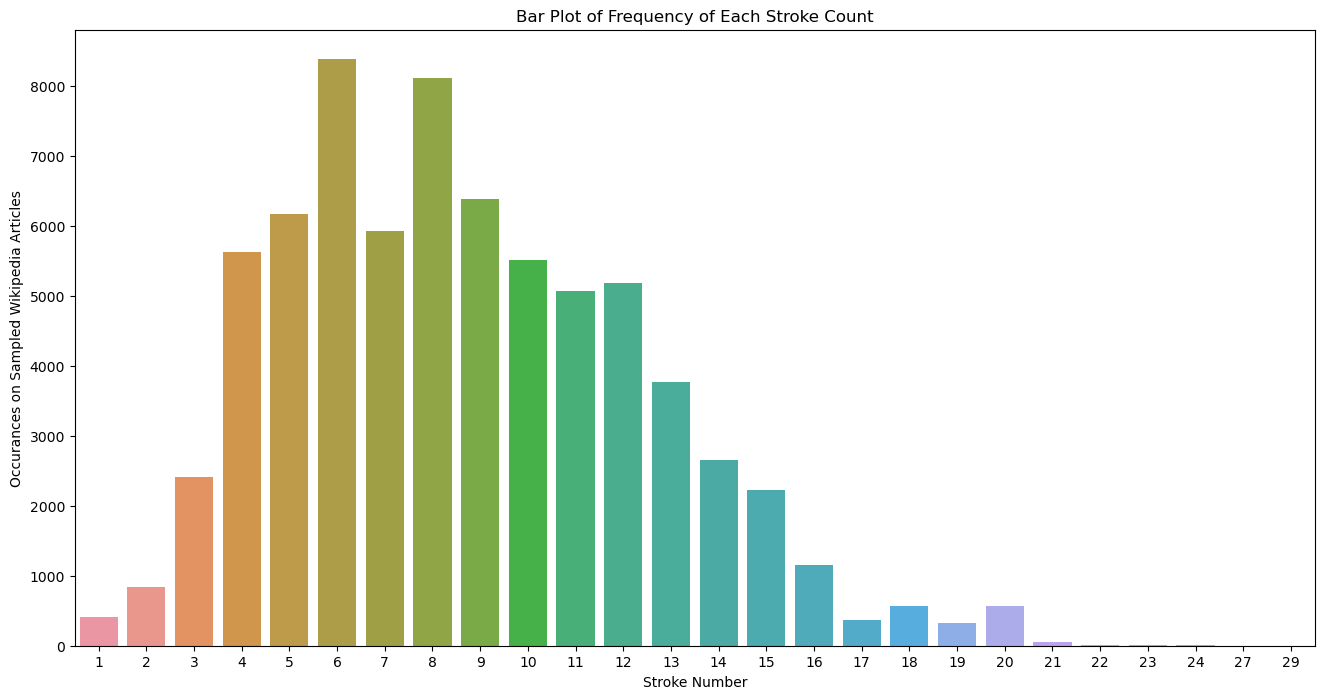

In [121]:
# Group by Stroke_Count and sum Wiki_Counts
grouped_on_stroke_count = kanji_df.groupby('Stroke_Count')['Wiki_Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='Stroke_Count', y='Wiki_Count', data=grouped_on_stroke_count, ci=None)
plt.title('Bar Plot of Frequency of Each Stroke Count')
plt.xlabel('Stroke Number')
plt.ylabel('Occurances on Sampled Wikipedia Articles')
plt.show()